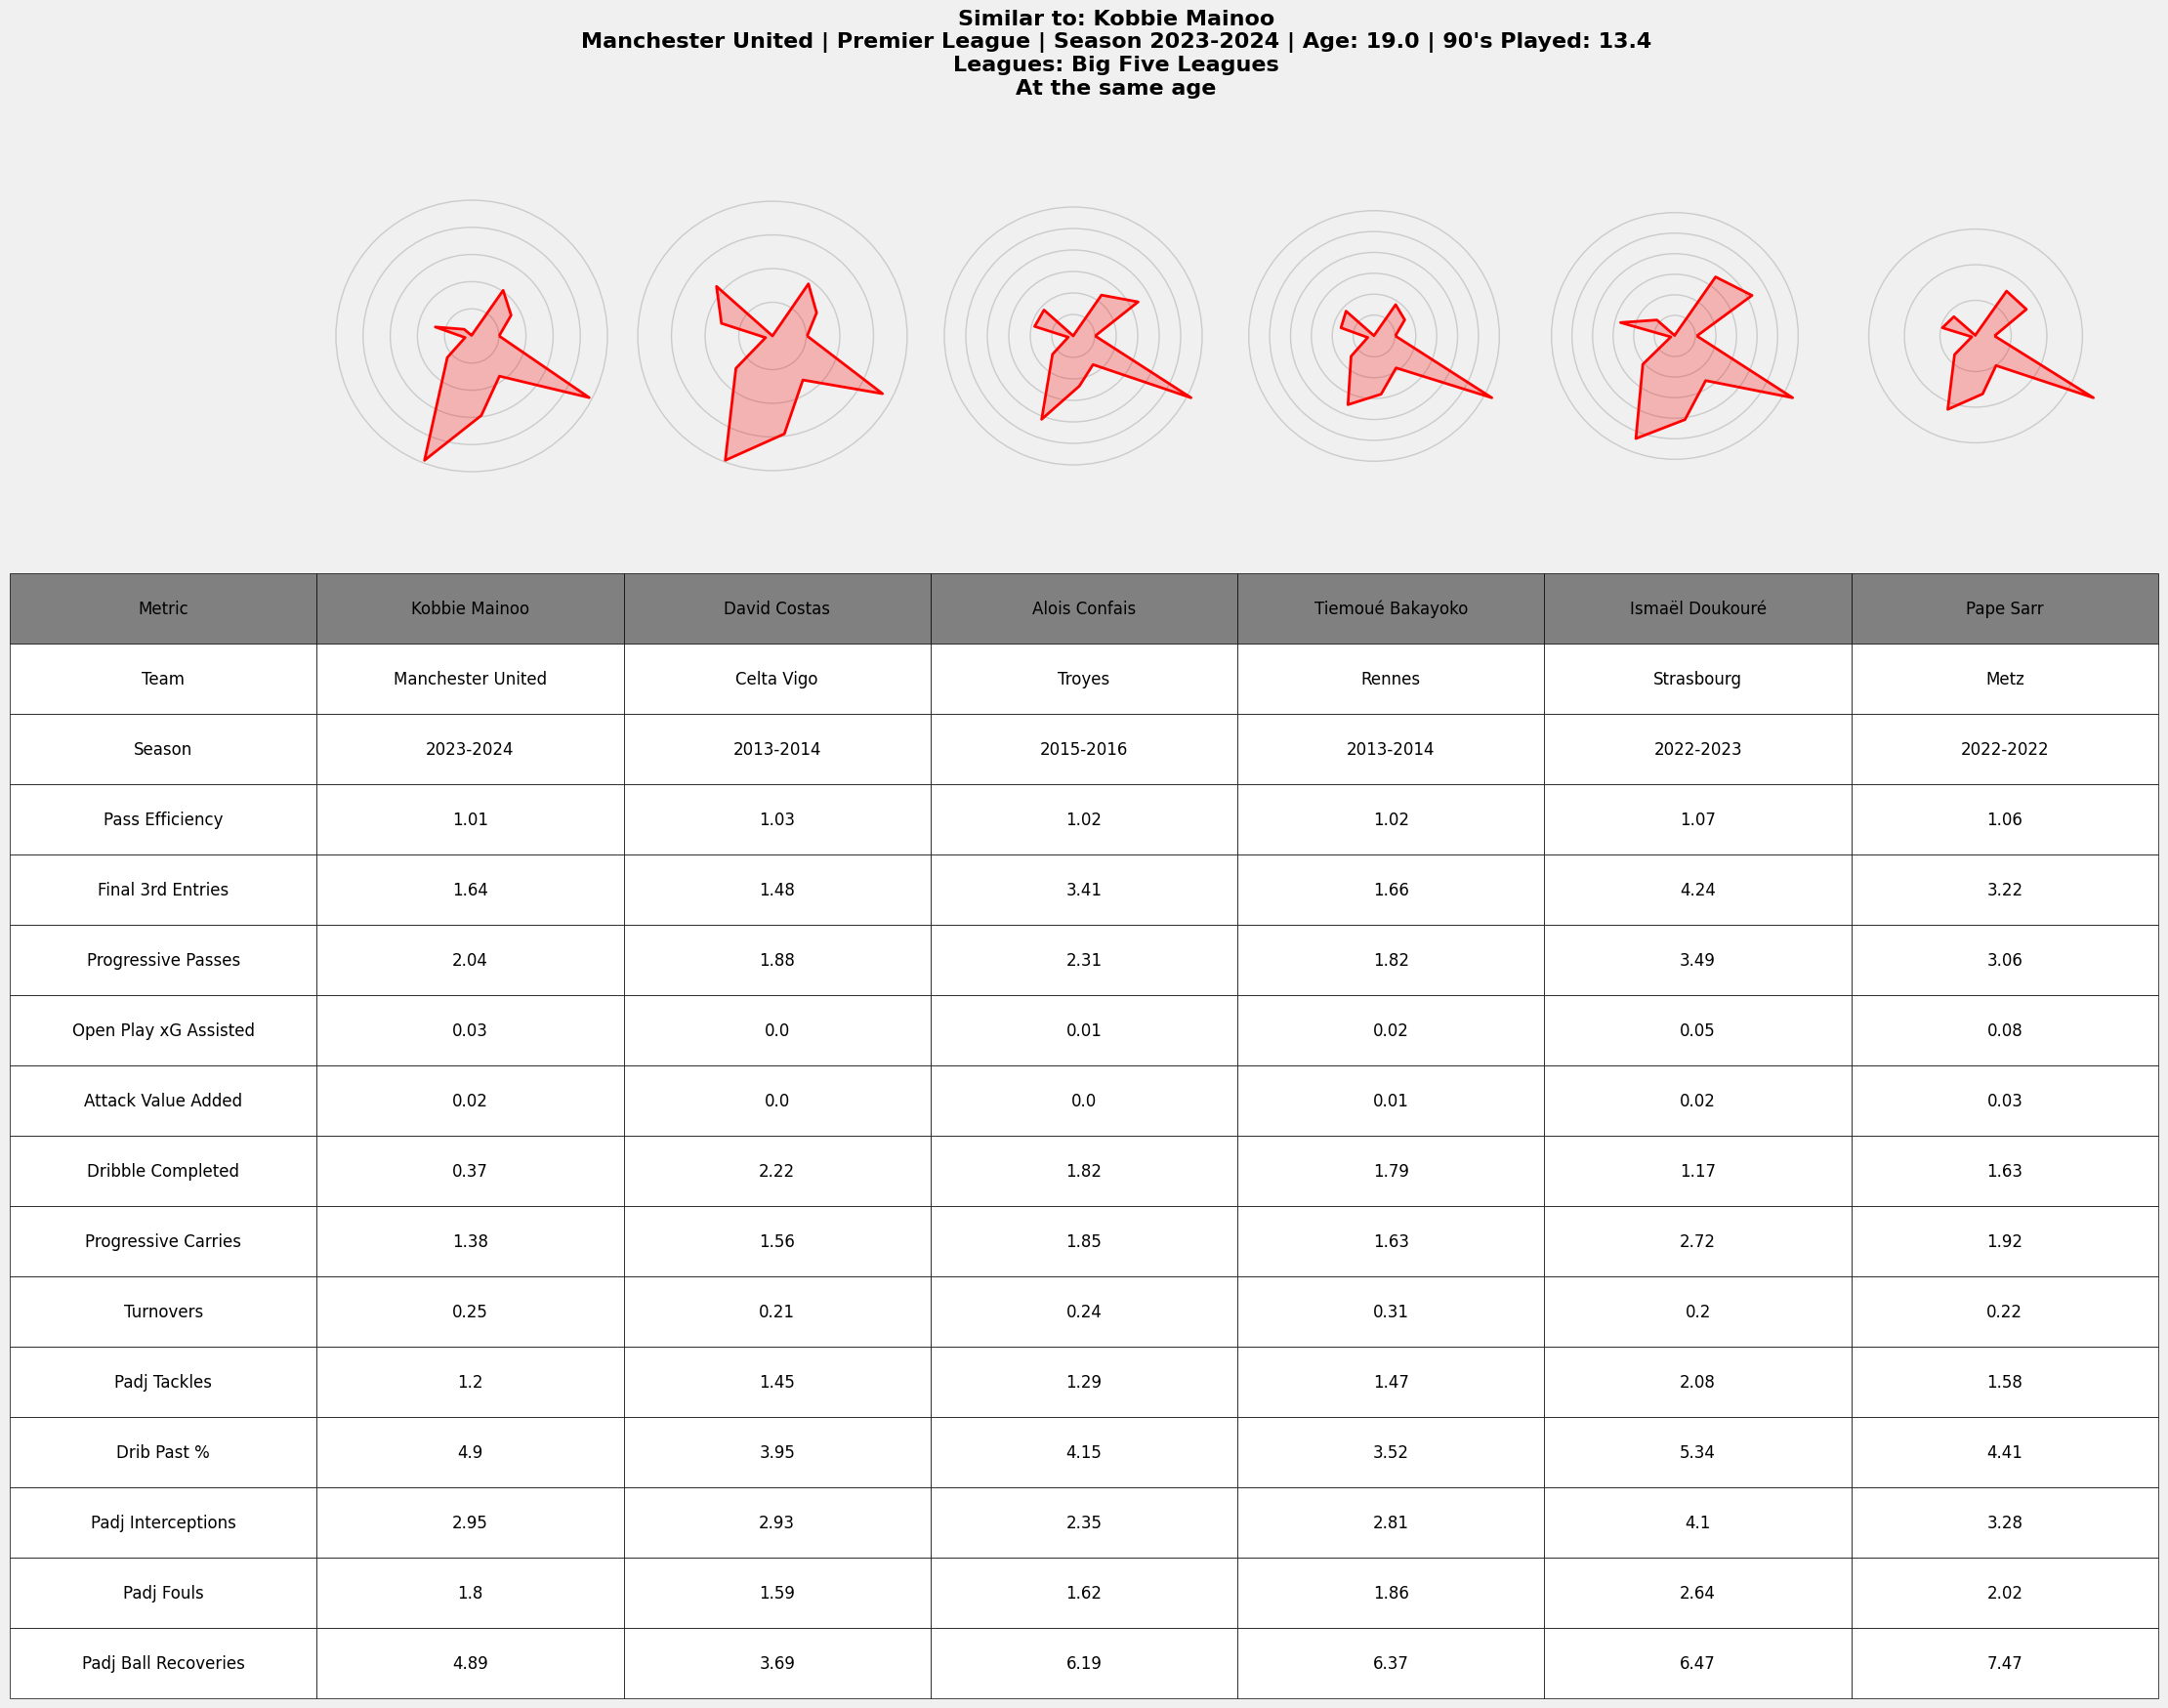

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Define the data with the updated structure
data = {
    'Metric': ['Team', 'Season', 'Pass Efficiency', 'Final 3rd Entries', 'Progressive Passes', 'Open Play xG Assisted', 
               'Attack Value Added', 'Dribble Completed', 'Progressive Carries', 'Turnovers', 'Padj Tackles', 'Drib Past %', 
               'Padj Interceptions', 'Padj Fouls', 'Padj Ball Recoveries'],
    'Kobbie Mainoo': ['Manchester United', '2023-2024', 1.01, 1.64, 2.04, 0.03, 0.02, 0.37, 1.38, 0.25, 1.2, 4.9, 2.95, 1.8, 4.89],
    'David Costas': ['Celta Vigo', '2013-2014', 1.03, 1.48, 1.88, 0.0, 0.0, 2.22, 1.56, 0.21, 1.45, 3.95, 2.93, 1.59, 3.69],
    'Alois Confais': ['Troyes', '2015-2016', 1.02, 3.41, 2.31, 0.01, 0.0, 1.82, 1.85, 0.24, 1.29, 4.15, 2.35, 1.62, 6.19],
    'Tiemoué Bakayoko': ['Rennes', '2013-2014', 1.02, 1.66, 1.82, 0.02, 0.01, 1.79, 1.63, 0.31, 1.47, 3.52, 2.81, 1.86, 6.37],
    'Ismaël Doukouré': ['Strasbourg', '2022-2023', 1.07, 4.24, 3.49, 0.05, 0.02, 1.17, 2.72, 0.2, 2.08, 5.34, 4.1, 2.64, 6.47],
    'Pape Sarr': ['Metz', '2022-2022', 1.06, 3.22, 3.06, 0.08, 0.03, 1.63, 1.92, 0.22, 1.58, 4.41, 3.28, 2.02, 7.47]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to plot radar charts
def plot_radar_chart(fig, ax_position, player_data):
    num_vars = len(player_data)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    player_data += player_data[:1]
    angles += angles[:1]

    radar_ax = fig.add_axes(ax_position, polar=True)
    radar_ax.fill(angles, player_data, color='red', alpha=0.25)
    radar_ax.plot(angles, player_data, color='red', linewidth=2)
    radar_ax.set_yticklabels([])
    radar_ax.set_xticks([])
    return radar_ax

# Set up figure and axes
fig, ax = plt.subplots(figsize=(22, 18))
ax.set_axis_off()

# Title
plt.text(0.5, 1.1, 'Similar to: Kobbie Mainoo\nManchester United | Premier League | Season 2023-2024 | Age: 19.0 | 90\'s Played: 13.4\nLeagues: Big Five Leagues\nAt the same age',
         horizontalalignment='center', verticalalignment='top', fontsize=16, fontweight='bold')

# Position for radar charts
radar_height = 0.25
radar_width = 0.13
radar_y = 0.65  # Adjust this value to move the radars higher or lower
radar_x_start = 0.15
radar_x_spacing = (1 - 2 * radar_x_start) / (len(df.columns) - 2)

# Add radar charts to the appropriate positions
for i in range(1, len(df.columns)):
    player_data = df.iloc[2:, i].values.tolist()  # Only numeric data for radar
    ax_position = [radar_x_start + (i-1) * radar_x_spacing, radar_y, radar_width, radar_height]
    plot_radar_chart(fig, ax_position, player_data)

# Add table beneath the radar charts
table_ax = fig.add_axes([0, 0, 1, 0.6])  # Adjust height to fit table below radar charts
table_ax.set_axis_off()
table = Table(table_ax, bbox=[0, 0, 1, 1])
ncols = len(df.columns)
nrows = len(df)

# Adding cells
for i in range(nrows):
    for j in range(ncols):
        cell_text = df.iloc[i, j]
        table.add_cell(i, j, 1/ncols, 1/nrows, text=cell_text, loc='center', facecolor='white')

# Add row and column labels
for i in range(len(df.columns)):
    table.add_cell(-1, i, 1/ncols, 1/nrows, text=df.columns[i], loc='center', facecolor='gray', edgecolor='black')

table.set_fontsize(12)
table_ax.add_table(table)

plt.show()


In [12]:
import matplotlib as mpl
mpl.get_configdir()


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\RaymondCarpenter\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib.libs'